In [4]:
import numpy as np
from sklearn.preprocessing import scale, robust_scale, minmax_scale
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import graphviz
import os
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
from sklearn import metrics
%matplotlib inline
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

In [5]:
ds_ch = pd.read_csv('./Downloads/week4day1/통신고객이탈.csv',encoding='CP949',engine='python')
ds_ch.head()
#타겟이 이산형

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [6]:
ds_ch.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [7]:
ds_ch["CHURN"].replace(to_replace = "Active", value=0, inplace=True)
ds_ch["CHURN"].replace(to_replace = "Churned", value=1, inplace=True)

In [12]:
ds_ch_dummy=pd.get_dummies(ds_ch.drop(["CUSTOMER_ID"], axis=1))
ds_ch_dummy.head()
#axis=1 -> column이라는 뜻
#단순 식별자 제거

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
ds_ch_scaled = scale(ds_ch_dummy)
ds_ch_scaled = pd.DataFrame(ds_ch_scaled, columns = ds_ch_dummy.columns)
ds_ch_scaled["CHURN"] = ds_ch["CHURN"]
ds_ch_scaled.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
1,0,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
2,0,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
3,0,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424
4,0,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,...,-0.455842,-0.109405,-0.104257,-0.373773,-0.269563,-0.128037,0.915393,-0.5848,-0.360572,-0.046424


In [14]:
np.random.seed(seed=1234)
msk=np.random.rand(ds_ch_dummy.shape[0]) <0.7
ds_ch_train=ds_ch_dummy[msk]
ds_ch_test=ds_ch_dummy[~msk]

ds_ch_train_y=ds_ch_train["CHURN"]
ds_ch_train_x=ds_ch_train.drop("CHURN", axis=1, inplace=False)
ds_ch_test_y=ds_ch_test["CHURN"]
ds_ch_test_x=ds_ch_test.drop("CHURN", axis=1, inplace=False)

print("train data X size : {}".format(ds_ch_train_x.shape))
print("train data Y size : {}".format(ds_ch_train_y.shape))
print("test data X size : {}".format(ds_ch_test_x.shape))
print("test data Y size : {}".format(ds_ch_test_y.shape))

train data X size : (635, 33)
train data Y size : (635,)
test data X size : (295, 33)
test data Y size : (295,)


In [119]:
from sklearn.model_selection import train_test_split
ds_ch_y=ds_ch_dummy["CHURN"]
ds_ch_x=ds_ch_dummy.drop("CHURN", axis=1, inplace=False)

ds_ch_train_x2, ds_ch_test_x2, ds_ch_train_y2, ds_ch_test_y2 = \
  train_test_split(ds_ch_x, ds_ch_y, test_size=0.30, random_state=1234)

print("train data X size : {}".format(ds_ch_train_x2.shape))
print("train data Y size : {}".format(ds_ch_train_y2.shape))
print("test data X size : {}".format(ds_ch_test_x2.shape))
print("test data Y size : {}".format(ds_ch_test_y2.shape))

train data X size : (651, 33)
train data Y size : (651,)
test data X size : (279, 33)
test data Y size : (279,)


In [39]:
tree_uncustomized=DecisionTreeClassifier(random_state=1234, min_samples_split=5)
tree_uncustomized.fit(ds_ch_train_x, ds_ch_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(ds_ch_train_x, ds_ch_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(ds_ch_test_x, ds_ch_test_y)))



Accuracy on training set: 0.987
Accuracy on test set: 0.847


In [40]:
tree_uncustomized.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')>

In [41]:
train_accuracy=[]
test_accuracy=[]

para_criterion=["gini", "entropy"]
for criterion in para_criterion:
    tree1=DecisionTreeClassifier(criterion=criterion, random_state=1234)
    tree1.fit(ds_ch_train_x, ds_ch_train_y)
    train_accuracy.append(tree1.score(ds_ch_train_x,ds_ch_train_y))
    test_accuracy.append(tree1.score(ds_ch_test_x,ds_ch_test_y))
    
ds_accuracy1=pd.DataFrame()
ds_accuracy1["Criterion"]=para_criterion
ds_accuracy1["TrainAccuracy"]=train_accuracy
ds_accuracy1["TestAccuracy"]=test_accuracy
ds_accuracy1.round(3)


,Criterion,TrainAccuracy,TestAccuracy
0,gini,1.0,0.851
1,entropy,1.0,0.831


In [43]:
train_accuracy=[]; test_accuracy=[]
para_criterion=[]; para_max_depth=[]
n_iter_depth=10
list_criterion=["gini", "entropy"]
for criterion in list_criterion:
    for depth in range(1, n_iter_depth+1):
        tree2=DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=1234)
        tree2.fit(ds_ch_train_x, ds_ch_train_y)
    
        train_accuracy.append(tree2.score(ds_ch_train_x,ds_ch_train_y))
        test_accuracy.append(tree2.score(ds_ch_test_x,ds_ch_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(depth)

In [44]:
ds_accuracy2=pd.DataFrame()
ds_accuracy2["Criterion"]=para_criterion
ds_accuracy2["Depth"]=para_max_depth
ds_accuracy2["TrainAccuracy"]=train_accuracy
ds_accuracy2["TestAccuracy"]=test_accuracy
ds_accuracy2.round(3)


,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.843,0.851
1,gini,2,0.871,0.878
2,gini,3,0.896,0.892
3,gini,4,0.907,0.834
4,gini,5,0.928,0.881
5,gini,6,0.935,0.871
6,gini,7,0.951,0.864
7,gini,8,0.956,0.864
8,gini,9,0.978,0.864
9,gini,10,0.992,0.851


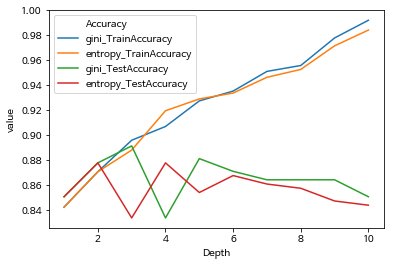

In [45]:
ds_accuracy2_melt=pd.melt(ds_accuracy2, id_vars=["Criterion", "Depth"])
ds_accuracy2_melt["Accuracy"]=ds_accuracy2_melt["Criterion"]+"_"+ds_accuracy2_melt["variable"]
sns.lineplot(x="Depth", y="value", hue="Accuracy", data=ds_accuracy2_melt)

In [47]:
train_accuracy=[]; test_accuracy=[]
para_criterion=[]; para_max_depth=[]; para_min_leaf_size=[]
max_depth=10
list_min_leaf_size=[i*10 for i in range(1,6)]

for criterion in list_criterion:
    for leafsize in list_min_leaf_size:
        tree3=DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_leaf=leafsize,\
                                     random_state=1234)
        tree3.fit(ds_ch_train_x, ds_ch_train_y)
        train_accuracy.append(tree3.score(ds_ch_train_x,ds_ch_train_y))
        test_accuracy.append(tree3.score(ds_ch_test_x,ds_ch_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(max_depth)
        para_min_leaf_size.append(leafsize)

In [48]:
ds_accuracy3=pd.DataFrame()
ds_accuracy3["Criterion"]=para_criterion
ds_accuracy3["Depth"]=para_max_depth
ds_accuracy3["MinLeafSize"]=para_min_leaf_size
ds_accuracy3["TrainAccuracy"]=train_accuracy
ds_accuracy3["TestAccuracy"]=test_accuracy
ds_accuracy3.round(3)

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,10,10,0.920,0.892
1,gini,10,20,0.896,0.864
2,gini,10,30,0.868,0.817
3,gini,10,40,0.817,0.773
4,gini,10,50,0.808,0.803
5,entropy,10,10,0.920,0.902
6,entropy,10,20,0.885,0.824
7,entropy,10,30,0.868,0.817
8,entropy,10,40,0.828,0.783
9,entropy,10,50,0.820,0.780


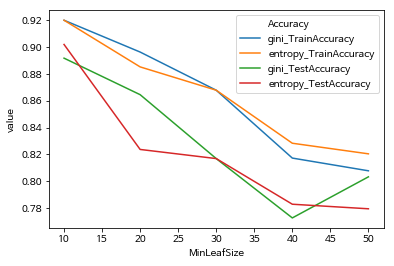

In [49]:
ds_accuracy3_melt=pd.melt(ds_accuracy3, id_vars=["Criterion", "Depth", "MinLeafSize"])
ds_accuracy3_melt["Accuracy"]=ds_accuracy3_melt["Criterion"]+"_"+ds_accuracy3_melt["variable"]
sns.lineplot(x="MinLeafSize", y="value", hue="Accuracy", data=ds_accuracy3_melt)

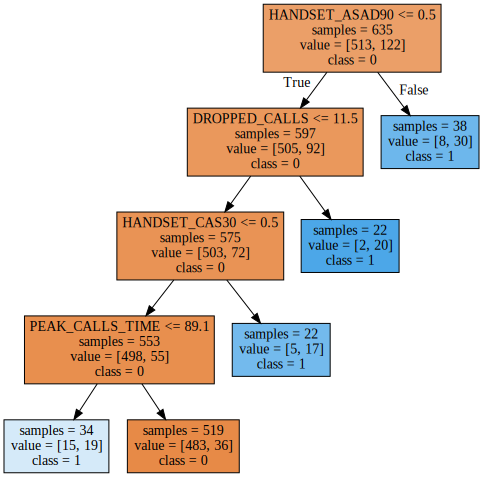

In [52]:
tree=DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=1234, min_samples_split=50, min_samples_leaf=5)
tree.fit(ds_ch_train_x,ds_ch_train_y)

export_graphviz(tree,out_file="tree.dot", class_names=["0","1"],
               feature_names=ds_ch_train_x.columns, impurity=False, filled=True)

os.environ["PATH"] += os.pathsep + "./"

with open("tree.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

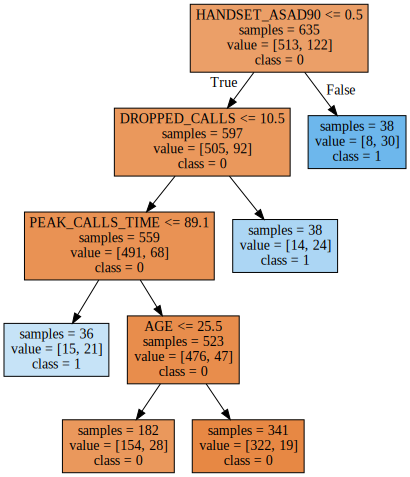

In [54]:
tree4=DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=25, random_state=1234)
tree5=tree4.fit(ds_ch_train_x, ds_ch_train_y)
export_graphviz(tree5,out_file="tree2.dot", class_names=["0","1"],
               feature_names=ds_ch_train_x.columns, impurity=False, filled=True)
with open("tree2.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

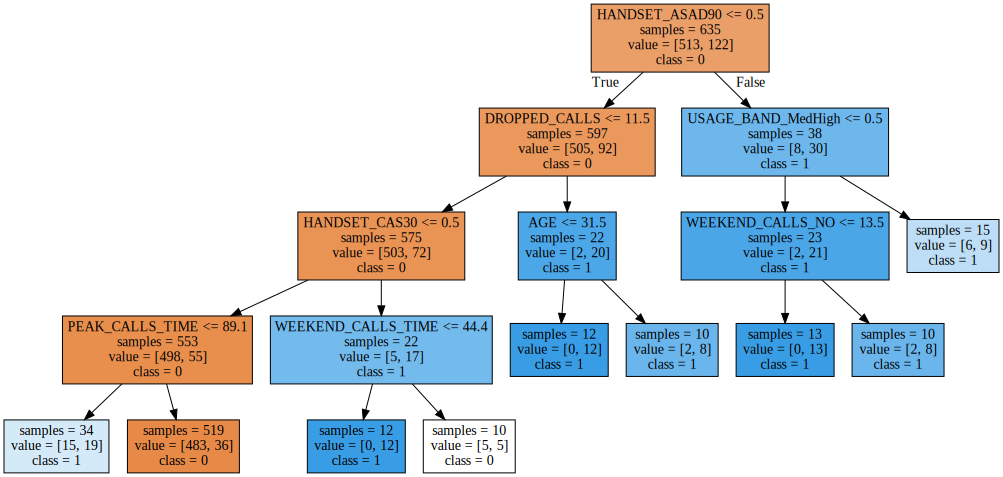

In [57]:
tree4=DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=10, random_state=1234)
tree5=tree4.fit(ds_ch_train_x, ds_ch_train_y)
export_graphviz(tree5,out_file="tree3.dot", class_names=["0","1"],
               feature_names=ds_ch_train_x.columns, impurity=False, filled=True)
with open("tree3.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [59]:
ds_feature_importance=pd.DataFrame()
ds_feature_importance["Feature"]=ds_ch_train_x.columns
ds_feature_importance["Importance"]=tree.feature_importances_
ds_feature_importance.sort_values("Importance", ascending=False)
ds_feature_importance.round(3)

,Feature,Importance
0,AGE,0.000
1,SERVICE_DURATION,0.000
2,DROPPED_CALLS,0.291
3,PEAK_CALLS_NO,0.000
4,PEAK_CALLS_TIME,0.171
5,WEEKEND_CALLS_NO,0.000
6,WEEKEND_CALLS_TIME,0.000
7,TOTAL_CALLS_NO,0.000
8,TOTAL_CALLS_TIME,0.000
9,GENDER_F,0.000


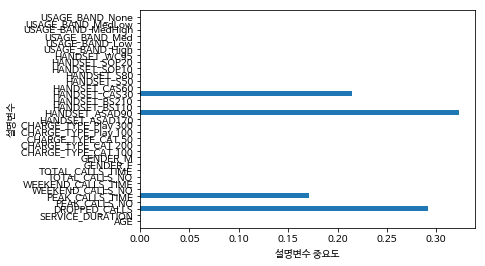

In [61]:
def plot_feature_importances(model):
    n_features=ds_ch_train_x.shape[1]
    plt.barh(range(n_features),model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), ds_ch_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1, n_features)
    
plot_feature_importances(tree)

# Random Forest

In [69]:
import pandas as pd
import numpy as np
#sklearn.preprocessing의 scale: 스케일 조정 패키지
from sklearn.preprocessing import scale

In [71]:
#sklearn.ensemble의 RandomForestClassifier:분류랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

In [72]:
ds_hmeq = pd.read_csv('./Downloads/week4day1/HMEQ.csv',encoding='CP949',engine='python')
ds_hmeq.head()
#타겟이 이산형

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [73]:
#결측치 확인
ds_hmeq.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [74]:
#fillna : 결측치 채우는 함수
ds_hmeq["JOB"].fillna("Other", inplace=True)
#아예 비면 빠지므로 아더 입력
ds_hmeq.fillna(ds_hmeq.mean(), inplace=True)
#연속형 데이터에 평균값 입력

In [75]:
ds_hmeq_dummy=pd.get_dummies(ds_hmeq)
ds_hmeq_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [76]:
np.random.seed(seed=1234)
msk=np.random.rand(ds_hmeq_dummy.shape[0]) <0.7
ds_hmeq_train=ds_hmeq_dummy[msk]
ds_hmeq_test=ds_hmeq_dummy[~msk]

ds_hmeq_train_y=ds_hmeq_train["BAD"]
ds_hmeq_train_x=ds_hmeq_train.drop("BAD", axis=1, inplace=False)
ds_hmeq_test_y=ds_hmeq_test["BAD"]
ds_hmeq_test_x=ds_hmeq_test.drop("BAD", axis=1, inplace=False)

print("train data X size : {}".format(ds_hmeq_train_x.shape))
print("train data Y size : {}".format(ds_hmeq_train_y.shape))
print("test data X size : {}".format(ds_hmeq_test_x.shape))
print("test data Y size : {}".format(ds_hmeq_test_y.shape))

train data X size : (2604, 18)
train data Y size : (2604,)
test data X size : (1144, 18)
test data Y size : (1144,)


In [77]:
rf_uncustomized=RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(ds_hmeq_train_x, ds_hmeq_train_y)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(ds_hmeq_train_x, ds_hmeq_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(ds_hmeq_test_x, ds_hmeq_test_y)))



Accuracy on training set: 0.992
Accuracy on test set: 0.948


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [78]:
rf_uncustomized

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [79]:
ds_hmeq_train_x_scaled=scale(ds_hmeq_train_x, axis=0)
ds_hmeq_test_x_scaled=scale(ds_hmeq_test_x, axis=0)
pd.DataFrame(ds_hmeq_train_x_scaled, columns=ds_hmeq_train_x.columns).head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.546445,-0.994709,-1.227453,-0.020546,-0.26517,-0.337599,-0.962571,-0.019984,-1.424138,0.372555,-1.566391,1.566391,-0.374973,-0.446595,1.217524,-0.587402,-0.135576,-0.184808
1,-1.537818,-1.040082,-1.177823,0.250021,-0.26517,-0.337599,-1.117329,-0.663021,-1.424138,0.344145,-1.566391,1.566391,-0.374973,-0.446595,1.217524,-0.587402,-0.135576,-0.184808
2,-1.494683,0.598052,0.247041,-0.967531,-0.26517,-0.337599,-1.090197,-0.663021,-0.898712,-0.313747,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808
3,-1.442920,0.633069,0.092557,-1.102815,-0.26517,-0.337599,-1.027931,-0.663021,-0.898712,-0.504711,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808
4,-1.442920,0.642472,0.242451,-0.967531,-0.26517,-0.337599,-0.961666,-0.663021,-0.898712,-0.521514,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808


In [82]:
rf_scaled=RandomForestClassifier(random_state=1234)
rf_scaled.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)

print("Accuracy on training set: {:.3f}".format(rf_scaled.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_scaled.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y)))



Accuracy on training set: 0.992
Accuracy on test set: 0.946


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [89]:
n_iter_tree=30
train_accuracy=[]
test_accuracy=[]

for n_tree in range(n_iter_tree):
    rf1=RandomForestClassifier(n_estimators=n_tree+1, random_state=1234)
    rf1.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
    train_accuracy.append(rf1.score(ds_hmeq_train_x_scaled,ds_hmeq_train_y))
    test_accuracy.append(rf1.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y))
    
ds_accuracy1=pd.DataFrame()
ds_accuracy1["NumberofTree"]=[n_tree + 1 for n_tree in range(n_iter_tree)]
ds_accuracy1["TrainAccuracy"]=train_accuracy
ds_accuracy1["TestAccuracy"]=test_accuracy

In [92]:
ds_accuracy1

,NumberofTree,TrainAccuracy,TestAccuracy
0,1,0.970430,0.926573
1,2,0.968510,0.937063
2,3,0.988479,0.941434
3,4,0.981183,0.942308
4,5,0.991167,0.942308
5,6,0.986175,0.944056
6,7,0.992704,0.947552
7,8,0.989247,0.944930
8,9,0.995008,0.944056
9,10,0.991935,0.945804


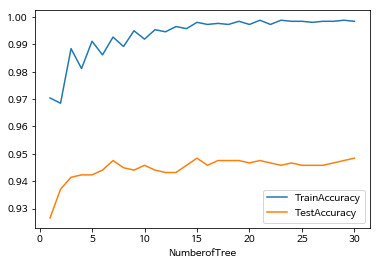

In [93]:
ds_accuracy1.set_index("NumberofTree", inplace=False).plot.line()

In [95]:
train_accuracy=[]
test_accuracy=[]

para_criterion=["gini", "entropy"]
for criterion in para_criterion:
    rf2=RandomForestClassifier(criterion=criterion, random_state=1234)
    rf2.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
    train_accuracy.append(rf2.score(ds_hmeq_train_x_scaled,ds_hmeq_train_y))
    test_accuracy.append(rf2.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y))
    
ds_accuracy2=pd.DataFrame()
ds_accuracy2["Criterion"]=para_criterion
ds_accuracy2["TrainAccuracy"]=train_accuracy
ds_accuracy2["TestAccuracy"]=test_accuracy
ds_accuracy2


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Criterion,TrainAccuracy,TestAccuracy
0,gini,0.991935,0.945804
1,entropy,0.994624,0.942308


In [96]:
train_accuracy=[]; test_accuracy=[]
para_max_depth=[i+1 for i in range(10)] * 2
n_iter_depth=10
para_criterion=["gini"]*n_iter_depth+["entropy"]*n_iter_depth
for (criterion,depth) in zip(para_criterion, para_max_depth):
    rf3=RandomForestClassifier(criterion=criterion, max_depth=depth, random_state=1234)
    rf3.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
    train_accuracy.append(rf3.score(ds_hmeq_train_x_scaled,ds_hmeq_train_y))
    test_accuracy.append(rf3.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y))
ds_accuracy3=pd.DataFrame()
ds_accuracy3["Criterion"]=para_criterion
ds_accuracy3["Depth"]=para_max_depth
ds_accuracy3["TrainAccuracy"]=train_accuracy
ds_accuracy3["TestAccuracy"]=test_accuracy

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/skl

In [97]:
ds_accuracy3

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.908986,0.910839
1,gini,2,0.913594,0.917832
2,gini,3,0.931644,0.932692
3,gini,4,0.933948,0.930944
4,gini,5,0.937788,0.936189
5,gini,6,0.939708,0.936189
6,gini,7,0.943548,0.930070
7,gini,8,0.947005,0.929196
8,gini,9,0.947773,0.937063
9,gini,10,0.952765,0.931818


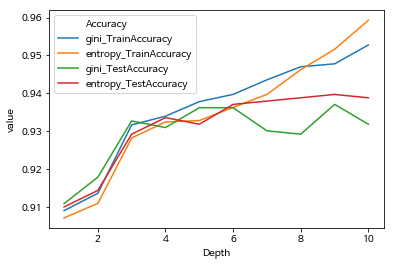

In [98]:
ds_accuracy3_melt=pd.melt(ds_accuracy3,id_vars=["Criterion","Depth"])
ds_accuracy3_melt["Accuracy"]=ds_accuracy3_melt["Criterion"]+"_"+ds_accuracy3_melt["variable"]
sns.lineplot(x="Depth",y="value",hue="Accuracy",data=ds_accuracy3_melt)

In [99]:
train_accuracy=[]
test_accuracy=[]
n_depth=4
n_iter_min_leaf_size=10
para_criterion=["gini"]*n_iter_min_leaf_size
para_min_leaf_size=[i+1 for i in range(n_iter_min_leaf_size)]

for (criterion,leafsize) in zip(para_criterion, para_min_leaf_size):
    rf4=RandomForestClassifier(criterion=criterion, max_depth=n_depth, min_samples_leaf=leafsize, random_state=1234)
    rf4.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
    train_accuracy.append(rf4.score(ds_hmeq_train_x_scaled,ds_hmeq_train_y))
    test_accuracy.append(rf4.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/skl

In [100]:
ds_accuracy4=pd.DataFrame()
ds_accuracy4["Criterion"]=para_criterion
ds_accuracy4["Depth"]=n_depth
ds_accuracy4["MinLeafSize"]=para_min_leaf_size
ds_accuracy4["TrainAccuracy"]=train_accuracy
ds_accuracy4["TestAccuracy"]=test_accuracy
ds_accuracy4

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,4,1,0.933948,0.930944
1,gini,4,2,0.933948,0.927448
2,gini,4,3,0.933948,0.929196
3,gini,4,4,0.932796,0.926573
4,gini,4,5,0.932796,0.932692
5,gini,4,6,0.932028,0.930070
6,gini,4,7,0.929724,0.930944
7,gini,4,8,0.929724,0.933566
8,gini,4,9,0.929724,0.930944
9,gini,4,10,0.929339,0.930070


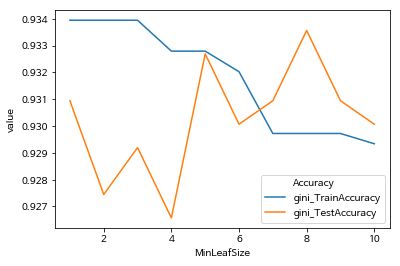

In [101]:
ds_accuracy4_melt=pd.melt(ds_accuracy4,id_vars=["Criterion","Depth","MinLeafSize"])
ds_accuracy4_melt["Accuracy"]=ds_accuracy4_melt["Criterion"]+"_"+ds_accuracy4_melt["variable"]
sns.lineplot(x="MinLeafSize",y="value",hue="Accuracy",data=ds_accuracy4_melt)

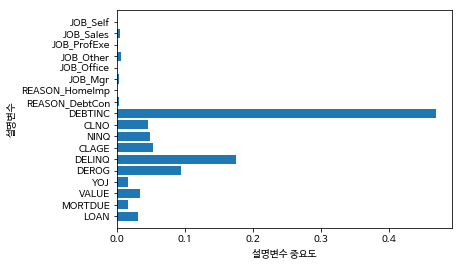

In [114]:
rf_model=RandomForestClassifier(criterion="gini", max_depth=4, min_samples_leaf=10,
                               n_estimators=100, random_state=1234)
rf_model.fit(ds_hmeq_train_x_scaled,ds_hmeq_train_y)

def plot_feature_importances(model):
    n_features=ds_hmeq_train_x.shape[1]
    plt.barh(range(n_features),model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), ds_hmeq_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1, n_features)

plot_feature_importances(rf_model)


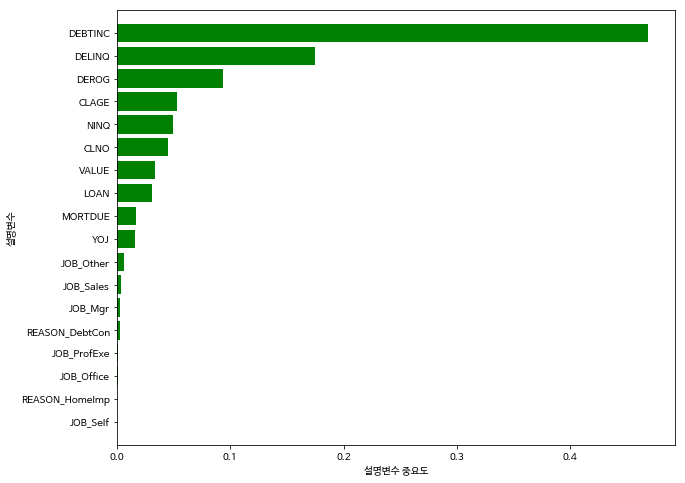

In [117]:
def plot_feature_importances(model):

    cols = ds_hmeq_train_x.columns

    importances = model.feature_importances_

    indices = np.argsort(model.feature_importances_)

    plt.barh(range(len(indices)), importances[indices], align="center", color='green')

    plt.yticks(range(len(indices)), [cols[i] for i in indices])

    plt.xlabel("설명변수 중요도")

    plt.ylabel('설명변수')

    plt.ylim(-1, len(cols))

 

# 설명 변수 중요도 그래프 함수 실행

plt.figure(figsize=(10,8))

plot_feature_importances(rf_model)

In [111]:
ds_feature_importance=pd.DataFrame()
ds_feature_importance["feature"]=ds_hmeq_train_x.columns
ds_feature_importance["importance"]=rf_model.feature_importances_
ds_feature_importance.sort_values(by="importance", ascending=False)

,feature,importance
9,DEBTINC,0.468840
5,DELINQ,0.174560
4,DEROG,0.093950
6,CLAGE,0.052626
7,NINQ,0.049195
8,CLNO,0.045021
2,VALUE,0.033994
0,LOAN,0.030995
1,MORTDUE,0.016462
3,YOJ,0.016066
